In [6]:
from vodscillator import *
import matplotlib.pyplot as plt
import numpy as np
import pickle
from plots import *
from vlodder import *
import scipy.io
from scipy.signal import *

In [7]:
if 1 == 1:
    filename = "V&D fig 3A, loc=0.1, glob=0, sr=128.pkl"
    filepath = "/home/deniz/Dropbox/vodscillators/deniz pickle jar/"
    with open(filepath + filename, 'rb') as picklefile:
        vod = pickle.load(picklefile)
        wf = vod.SOO_sol[vod.n_transient:]
    #wf = np.pad(wf, 20) #padding might help???


if 0 == 1:
    filename = 'AC6rearSOAEwfB1.mat'
    filename = 'TH14RearwaveformSOAE.mat'
    mat = scipy.io.loadmat('SOAE Data/' + filename)
    wf = np.squeeze(mat['wf'])
    wf_title = filename




/tmp/ipykernel_403125/2034731494.py:5: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  vod = pickle.load(picklefile)


In [13]:
sr = 44100 #44100 for SOAE data, 128 for vod simulation
win_size = 2048
xmin=0
xmax=3
ymin=None
ymax=None
# ymin=0
# ymax=8
#t_win = win_size / sample_rate
t_win = 0.1
hann = True
t_shift = t_win  #set this to half the window size #it used to be 0.1
khz=True
db = True

In [14]:
def temp_plot(wf, ax):
    # get wfft so we don't have to do it twice below
    d = get_wfft(wf=wf, sr=sr, t_win=t_win, t_shift=t_shift, hann=hann)
    wfft = d["wfft"]
    # we'll want to pass this through the subsequent functions as well to maintain correspondence through all the shifts
    freq_ax = d["freq_ax"]
    

    # get (averaged over windows) PSD
    m = get_mags(wf=wf, sr=sr, t_win=t_win, wfft=wfft, freq_ax=freq_ax, return_all=True)
    mags = m["mags"]
    mags_freq_ax = m["freq_ax"]
    # get coherence
    c = get_coherence(wf=wf, sr=sr, t_win=t_win, wfft=wfft, ref_type=ref_type, freq_ax=freq_ax, bin_shift=1, return_all=True)
    coherence = c["coherence"]
    coherence_freq_ax = c["freq_ax"]

    
    if khz:
        mags_freq_ax = mags_freq_ax / 1000
        coherence_freq_ax = coherence_freq_ax / 1000


    if db:
        mags = 20*np.log10(mags)

    
    ax.plot(coherence_freq_ax, coherence, color='purple', label="Phase Coherence")
    ax.set_ylabel("Vector Strength")
    ax.set_xlabel("Frequency [kHz]")
    ax.set_xlim(xmin, xmax)
    ax.legend(loc="upper right")
    
    ax2 = ax.twinx()
    ax2.plot(mags_freq_ax, mags, color="red", label="Magnitude")
    ax2.set_ylabel("Magnitude [dB]")
    ax2.set_xlabel("Frequency [kHz]")
    ax2.set_xlim(xmin, xmax)
    ax2.legend(loc="lower right")
    


    # plot + set labels

    #phase_diffs = c["phase_diffs"]
    #means = np.mean(np.abs(phase_diffs[:, :])/np.pi, 0)
    #label = r"$\langle|\phi_j^{{\theta}}|\rangle/\pi$"
    #ax.plot(coherence_freq_ax, means, label=label, color='C0')


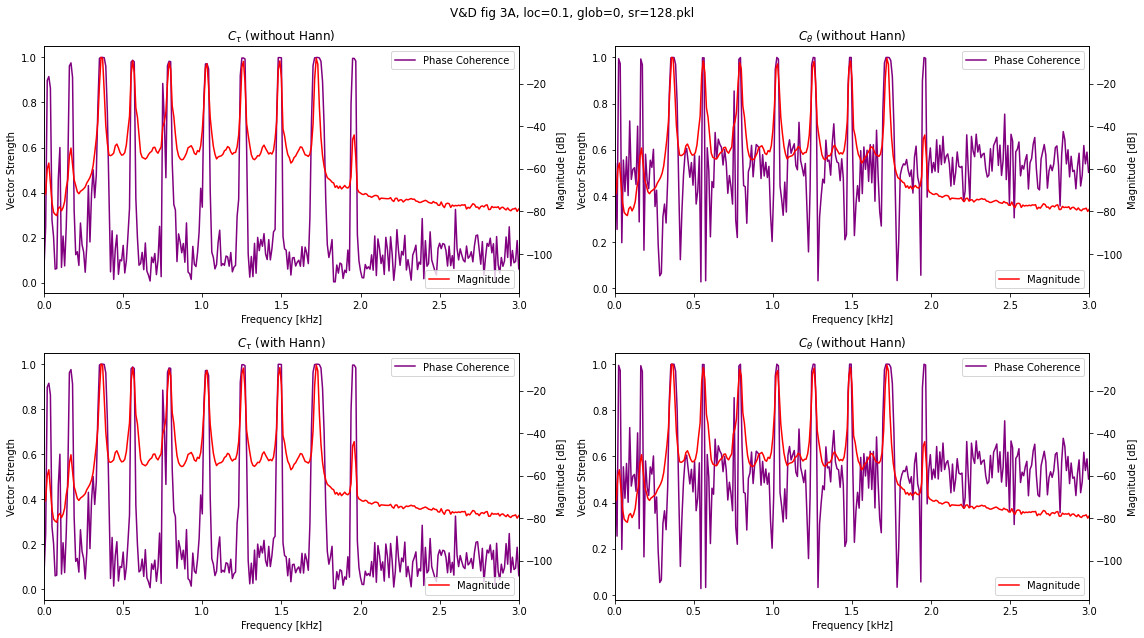

In [15]:
fig, _ = plt.subplots(2, 2)
axes = fig.axes



#plt.rcParams.update({
#    "text.usetex": True,
#    "font.family": "DejaVuSans"
#    "font."
#})


fig.suptitle(str((filename)))




ref_type = "next_win"
temp_plot(wf, axes[0])
axes[0].set_title(r"$C_{\tau}$ (without Hann)")


ref_type="next_freq"
temp_plot(wf, axes[1])
axes[1].set_title(r"$C_{\theta}$ (without Hann)")


ref_type = "next_win"
temp_plot(wf, axes[2])
axes[2].set_title(r"$C_{\tau}$ (with Hann)")


ref_type="next_freq"
temp_plot(wf, axes[3])
axes[3].set_title(r"$C_{\theta}$ (without Hann)")


dpi=300
reso=[16, 9]
bbox="tight"
plt.gcf().set_size_inches(reso) # set figure's size manually to your full screen (32x18)
plt.tight_layout()



save_name = str("Hann comparison " + str(filename) + ".jpg")
plt.savefig(save_name, dpi=dpi, bbox_inches=bbox, format="jpeg")
plt.show()

